## Author: Tanvi Bhagat

## Regression and Hypothesis Testing

### 1. Remove/manipulate/transform features from the data set, remain only useful data
### 2. Graphically and numerically describe model performance and find the relation between them
### 3. Apply regression analysis techniques and EDA principles to find out what features will influence the rental price.

### Importing Packages

In [2]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import pylab 
import statsmodels.api as sm

from scipy import stats
from sklearn import datasets
from sklearn import linear_model

from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

from matplotlib import pyplot as plt
from matplotlib.ticker import PercentFormatter

from pylab import rcParams

rcParams['figure.figsize'] = (23, 8)
sns.set_style('whitegrid')
plt.style.use('seaborn-whitegrid')

## Acquiring data and performing modifications

In [3]:
data_path="https://docs.google.com/spreadsheets/d/e/2PACX-1vQWoROnzn964JhMdNOhXVmnxhGvHTK8nEZEXDbnMjLWRAZVZtjtAuzlxxPZlqInoA_bB_banCcgP1P1/pub?gid=364478474&single=true&output=csv"
ac= pd.read_csv(data_path)

In [4]:
list(ac)

['id',
 'country',
 'state',
 'neighbourhood_cleansed',
 'property_type',
 'square_meters',
 'price',
 'room_type',
 'bathrooms',
 'bedrooms',
 'beds']

In [5]:
ac.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3974 entries, 0 to 3973
Data columns (total 11 columns):
id                        3974 non-null int64
country                   3974 non-null object
state                     3781 non-null object
neighbourhood_cleansed    3974 non-null object
property_type             3974 non-null object
square_meters             3974 non-null float64
price                     3974 non-null object
room_type                 3974 non-null object
bathrooms                 3969 non-null float64
bedrooms                  3972 non-null float64
beds                      3973 non-null float64
dtypes: float64(4), int64(1), object(6)
memory usage: 341.6+ KB


In [6]:
ac.columns

Index(['id', 'country', 'state', 'neighbourhood_cleansed', 'property_type',
       'square_meters', 'price', 'room_type', 'bathrooms', 'bedrooms', 'beds'],
      dtype='object')

In [7]:
ac['neighbourhood_cleansed'].unique

<bound method Series.unique of 0       BALLINA SHIRE COUNCIL
1       BALLINA SHIRE COUNCIL
2       BALLINA SHIRE COUNCIL
3       BALLINA SHIRE COUNCIL
4       BALLINA SHIRE COUNCIL
                ...          
3969      TWEED SHIRE COUNCIL
3970      TWEED SHIRE COUNCIL
3971      TWEED SHIRE COUNCIL
3972      TWEED SHIRE COUNCIL
3973      TWEED SHIRE COUNCIL
Name: neighbourhood_cleansed, Length: 3974, dtype: object>

In [8]:
ac.head(2)

,id,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,3363954,Australia,NSW,BALLINA SHIRE COUNCIL,House,0.00,"$2,900.00",Entire home/apt,3.0,4.0,4.0
1,13048065,Australia,NSW,BALLINA SHIRE COUNCIL,House,1.55,$28.00,Private room,1.0,1.0,1.0


#### Dataset Interpretion:
<ul>
<li>country - The country in which the listing resides.</li>
<li>state - The state in which the listing resides.</li>
<li>neighbourhood_cleansed - A modified version of the neighborhood that can be used for grouping.</li>
<li>property_type - The type of property that is being listed (e.g., House).</li>
<li>square_meters - A unit of area equal to a square one meter on each side, the dimension of the property
price - The cost of the rental per night in USD.</li>
<li>room_type - The type of room that is available for rent (e.g., a private room).</li>
<li>bathrooms - The count of bathrooms available (e.g., 1, 2, 1.5).</li>
<li>bedrooms - The count of bedrooms available (e.g., 0, 1, 2).</li>
<li>beds - The count of beds available in the rental (e.g., 1, 2, 3).</li>
<li>Explore the quantative variables (e.g., price)</li>

</ul>

#### A few explorations:
  <ul>
<li>The max price for a rental is 11.5K - it's much higher than the mean 802 rental price. It must be some rental!</li>
<li>There is an entry for a 1 dollar rental - it does not seem right.</li>
<li>The median price for a rental is 509 - it's below the mean of 802, suggesting a positive skew</li>
<li>Theere is an entry for a 0 square meters rental property - it does not seem right.</li>
<li>The max square meters of the rental property is 208.7 - it's much higher than the mean 32.7. It must be a huge place which need more investigate.</li>
    </ul>

In [9]:
ac=ac.replace(to_replace=['nsw','Nsw','New South Wales','NSW'], value='NSW')
ac=ac.replace(to_replace=['qld','Qld','Queensland','QLD'], value='QLD')

In [10]:
ac['state'].unique()

array(['NSW', nan, 'QLD', 'queensland'], dtype=object)

In [11]:
#checking for null values
ac.isnull().sum()

id                          0
country                     0
state                     193
neighbourhood_cleansed      0
property_type               0
square_meters               0
price                       0
room_type                   0
bathrooms                   5
bedrooms                    2
beds                        1
dtype: int64

In [12]:
ac['state']=ac.state.fillna(method='ffill')
ac['bedrooms']=ac.bedrooms.fillna(method='ffill')
ac['bathrooms']=ac.bathrooms.fillna(method='ffill')
ac['beds']=ac.beds.fillna(method='ffill')

In [13]:
#Removing $ sign from price column
ac['price'] = ac['price'].str.replace(',', '')
ac['price'] = ac['price'].str.replace('$', '')
ac['price'] = ac['price'].astype(float)

In [14]:
ac.head(2)

,id,country,state,neighbourhood_cleansed,property_type,square_meters,price,room_type,bathrooms,bedrooms,beds
0,3363954,Australia,NSW,BALLINA SHIRE COUNCIL,House,0.00,2900.0,Entire home/apt,3.0,4.0,4.0
1,13048065,Australia,NSW,BALLINA SHIRE COUNCIL,House,1.55,28.0,Private room,1.0,1.0,1.0


In [15]:
ac.dtypes

id                          int64
country                    object
state                      object
neighbourhood_cleansed     object
property_type              object
square_meters             float64
price                     float64
room_type                  object
bathrooms                 float64
bedrooms                  float64
beds                      float64
dtype: object

In [16]:
#Trimming Outliers
start_percentile_price= ac['price'].quantile(0.1)
end_percentile_price= ac['price'].quantile(0.99)
ac1=ac.loc[((ac['price']>1) & (ac['price']< 2450))]
ac2= ac1.loc[((ac1['square_meters'] < 80)&(ac1['square_meters'] > 2))]
final_ac= ac2.copy()

### Filters to focus on specific areas 

### As the data about the Richmond neighbourhood is too less, we will only consider the other four neighbourhoods for our analysis.

In [17]:
dc1= ac2.loc[(ac2['neighbourhood_cleansed']=='BALLINA SHIRE COUNCIL')]
dc2= dc1.loc[(dc1['property_type']=='House')]
dc3= dc2.loc[(dc2['state']=='NSW')]
dc4= dc3.loc[(dc3['room_type']=='Entire home/apt')]

In [18]:
#Removing unwanted columns from the dataset
ac_new= dc4.drop(columns=['id','country','beds'])

### Describing Quantitative Variables

In [19]:
ac_new.describe()

,square_meters,price,bathrooms,bedrooms
count,192.000000,192.000000,192.000000,192.000000
mean,38.595417,923.046875,2.023438,3.177083
std,11.329646,634.249784,0.786484,1.180068
min,18.140000,75.000000,1.000000,0.000000
25%,29.070000,367.500000,1.500000,2.750000
50%,38.495000,785.000000,2.000000,3.000000
75%,46.822500,1439.500000,2.500000,4.000000
max,63.820000,2410.000000,5.000000,7.000000


### Describing Qualitative Variables

In [20]:
ac_new[['neighbourhood_cleansed','property_type', 'room_type']].describe()

,neighbourhood_cleansed,property_type,room_type
count,192,192,192
unique,1,1,1
top,BALLINA SHIRE COUNCIL,House,Entire home/apt
freq,192,192,192


## Column List
#### neighbourhood_cleansed - A modified version of the neighborhood that can be used for grouping--Only Long Beach is included
#### property_type - The type of property that is being listed 
#### room_type - The type of room that is available for rent (e.g., a shared room)---Only "Entire home/apt" is included.
#### bathrooms - The count of bathrooms available 
#### bedrooms - The count of bedrooms available 
#### beds - The count of beds available in the rental 
#### price - The cost of the rental per night in USD.
#### Square_meters - The area of the room.
#### Country - Name of the Country 
#### State - Name of the state belonging to that particular country

## Describing Regression Approach

### Simple linear regression is a statistical method that allows us to summarize and study relationships between two continuous (quantitative) variables: One variable, denoted x, is regarded as the predictor, or independent variable.

(10, 2500)

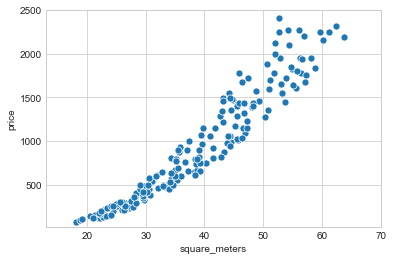

In [21]:
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = ac_new, s=50)
plt.xlim([13,70])
plt.ylim([10,2500])

### Fiting a line using a graph.

(10, 2500)

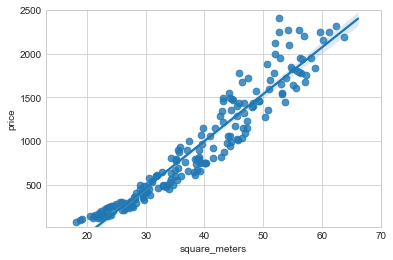

In [22]:
ax = sns.regplot(x = 'square_meters', y = 'price', data = ac_new, scatter_kws={'s':45})
plt.xlim([13,70])
plt.ylim([10,2500])

## Fit a line with Sci-Kit Learn

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

X_cols = ['square_meters']

#Load the X data set
X = ac_new[X_cols].values

#Initialize the data and column length variables
data_length = len(ac_new)
column_length = len(ac_new[X_cols].columns)

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = ac_new['price'].values
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test)

## Taking the results from above and printing out a few pieces of information

In [24]:
#Print a few predictions
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

#Print the coefficient(s)
coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, listing_y_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test, listing_y_pred))

   y_prediction
0   1540.173225
1    497.120999
2    712.815529
3    857.140546
4    963.401822

Intercept: -1121.6453036419994
   square_meters
0      52.866306

Mean Squared Error (MSE):37578.44
Variance Score (R^2):0.91


In [25]:
print(" Root Mean Squared Error (RMSE):%.2f" % np.sqrt(mean_squared_error(y_test, listing_y_pred)))

 Root Mean Squared Error (RMSE):193.85


## Re-ploting the graph using the results from Scikit-Learn

(10, 2500)

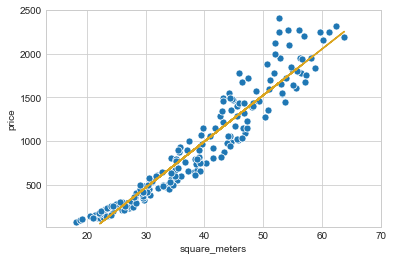

In [26]:
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = ac_new, s=50)
plt.plot(X_test, listing_y_pred, color='goldenrod')
plt.xlim([13,70])
plt.ylim([10,2500])

## Checking for Residuals

Text(0.5, 1.0, 'RESIDUALS HISTOGRAM')

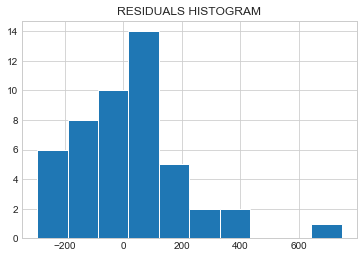

In [27]:
#Residuals
residuals = y_test - listing_y_pred
plt.hist(residuals)
plt.title("RESIDUALS HISTOGRAM")

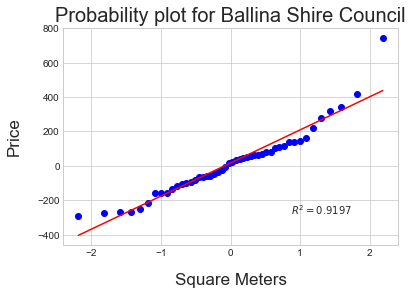

In [28]:
#probability plot

res_reshaped = residuals.reshape(-1,)  
stats.probplot(res_reshaped, dist="norm", plot=pylab, rvalue=True)
plt.title("Probability plot for Ballina Shire Council", fontsize=20)
plt.xlabel("Square Meters", labelpad = 15, fontsize=17)
plt.ylabel("Price", labelpad = 15, fontsize=17);

pylab.show()



(10, 2500)

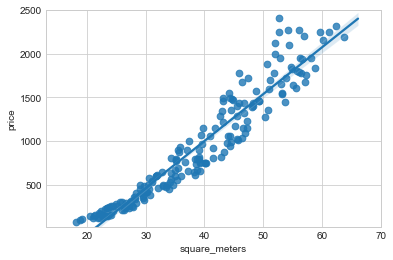

In [29]:
ax = sns.regplot(x = 'square_meters', y = 'price', data = ac_new, scatter_kws={'s':45})
plt.xlim([13,70])
plt.ylim([10,2500])

## Creating Scatter and Regplot for Lismore City Council

In [30]:
#LISMORE CITY COUNCIL
dc1= ac2.loc[(ac2['neighbourhood_cleansed']=='LISMORE CITY COUNCIL')]
dc2= dc1.loc[(dc1['property_type']=='House')]
dc3= dc2.loc[(dc2['state']=='NSW')]
dc4= dc3.loc[(dc3['room_type']=='Entire home/apt')]

In [31]:
ac_new1= dc4.drop(columns=['id','country','beds'])
ac_new1.describe()

,square_meters,price,bathrooms,bedrooms
count,49.000000,49.000000,49.000000,49.000000
mean,37.734694,415.020408,1.551020,2.714286
std,20.826441,447.462312,0.708908,0.889757
min,8.000000,65.000000,1.000000,1.000000
25%,19.000000,150.000000,1.000000,2.000000
50%,37.000000,225.000000,1.000000,3.000000
75%,54.000000,479.000000,2.000000,3.000000
max,74.000000,2295.000000,3.000000,5.000000


(10, 2500)

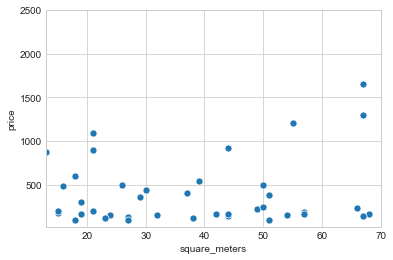

In [32]:
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = ac_new1, s=50)
plt.xlim([13,70])
plt.ylim([10,2500])

(10, 2500)

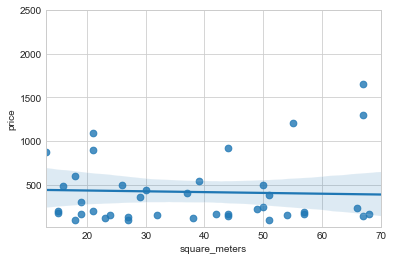

In [33]:
ax = sns.regplot(x = 'square_meters', y = 'price', data = ac_new1, scatter_kws={'s':45})
plt.xlim([13,70])
plt.ylim([10,2500])

###  Fiting a line with Sci-Kit Learn 

In [34]:
X_cols = ['square_meters']

#Load the X data set
X = ac_new1[X_cols].values

#Initialize the data and column length variables
data_length = len(ac_new1)
column_length = len(ac_new1[X_cols].columns) 

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = ac_new1['price'].values
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test)

In [35]:
#Printing Predictions
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

#Print the coefficient(s)
coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, listing_y_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test, listing_y_pred))

   y_prediction
0    289.370925
1    438.900488
2    483.355223
3    451.024507
4    341.908339

Intercept: 560.1406744084613
   square_meters
0       -4.04134

Mean Squared Error (MSE):200488.72
Variance Score (R^2):-0.21


In [36]:
print(" Root Mean Squared Error (RMSE):%.2f" % np.sqrt(mean_squared_error(y_test, listing_y_pred)))

 Root Mean Squared Error (RMSE):447.76


(10, 2500)

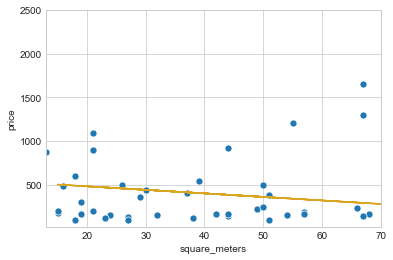

In [37]:
#Re-plot the graph using the results from Scikit-Learn
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = ac_new1, s=50)
plt.plot(X_test, listing_y_pred, color='goldenrod')
plt.xlim([13,70])
plt.ylim([10,2500])

Text(0.5, 1.0, 'HISTOGRAM OF RESIDUALS')

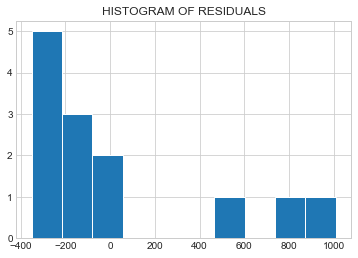

In [38]:
#Residuals
residuals = y_test - listing_y_pred
plt.hist(residuals)
plt.title("HISTOGRAM OF RESIDUALS")

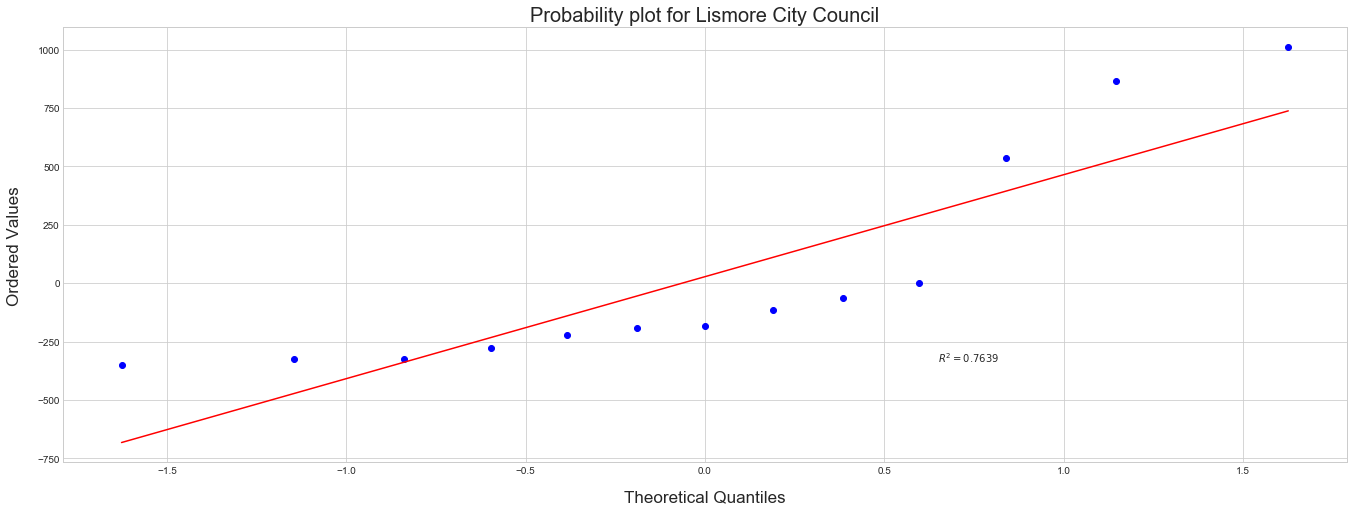

In [40]:
#probability plot
res_reshaped = residuals.reshape(-1,)  
stats.probplot(res_reshaped, dist="norm", plot=pylab, rvalue=True)
plt.title("Probability plot for Lismore City Council", fontsize=20)
plt.xlabel("Theoretical Quantiles", labelpad = 15, fontsize=17)
plt.ylabel("Ordered Values", labelpad = 15, fontsize=17);

pylab.show()

## Creating Scatter and Regplot for Tweed Shire Council

In [41]:
#TWEED SHIRE COUNCIL
dc1= ac2.loc[(ac2['neighbourhood_cleansed']=='TWEED SHIRE COUNCIL')]
dc2= dc1.loc[(dc1['property_type']=='House')]
dc3= dc2.loc[(dc2['state']=='NSW')]
dc4= dc3.loc[(dc3['room_type']=='Entire home/apt')]

In [42]:
ac_new2= dc4.drop(columns=['id','country','beds'])
ac_new2.describe()

,square_meters,price,bathrooms,bedrooms
count,324.000000,324.000000,324.000000,324.000000
mean,48.551975,814.811728,2.138889,3.407407
std,14.507153,495.704170,0.763425,1.073495
min,3.260000,78.000000,1.000000,0.000000
25%,40.872500,418.000000,2.000000,3.000000
50%,51.980000,700.000000,2.000000,3.500000
75%,59.512500,1250.000000,2.500000,4.000000
max,69.260000,1851.000000,4.000000,6.000000


(10, 2500)

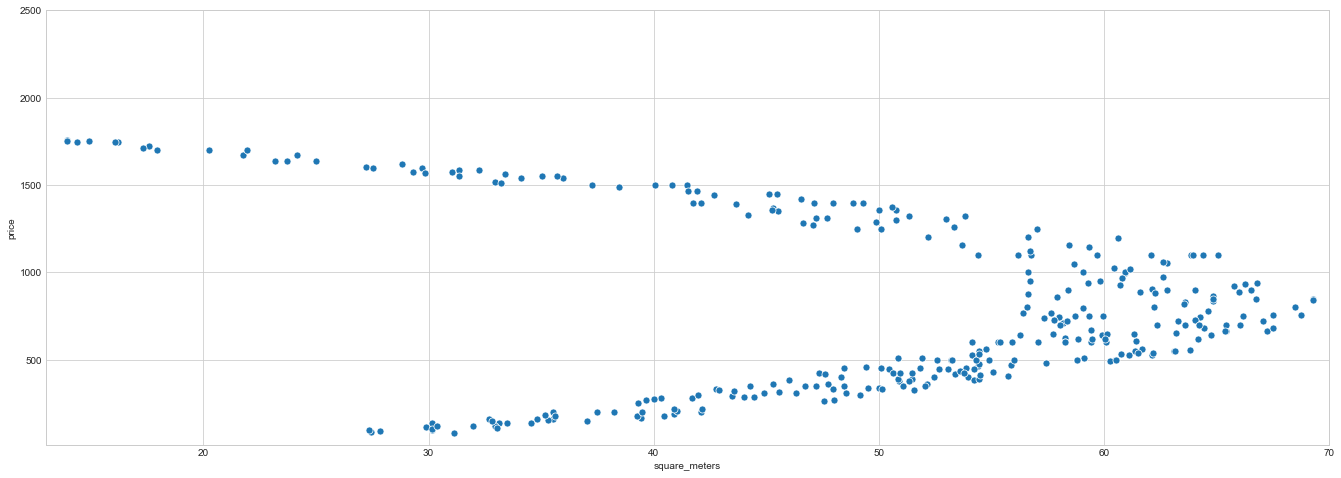

In [43]:
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = ac_new2, s=50)
plt.xlim([13,70])
plt.ylim([10,2500])

(10, 2500)

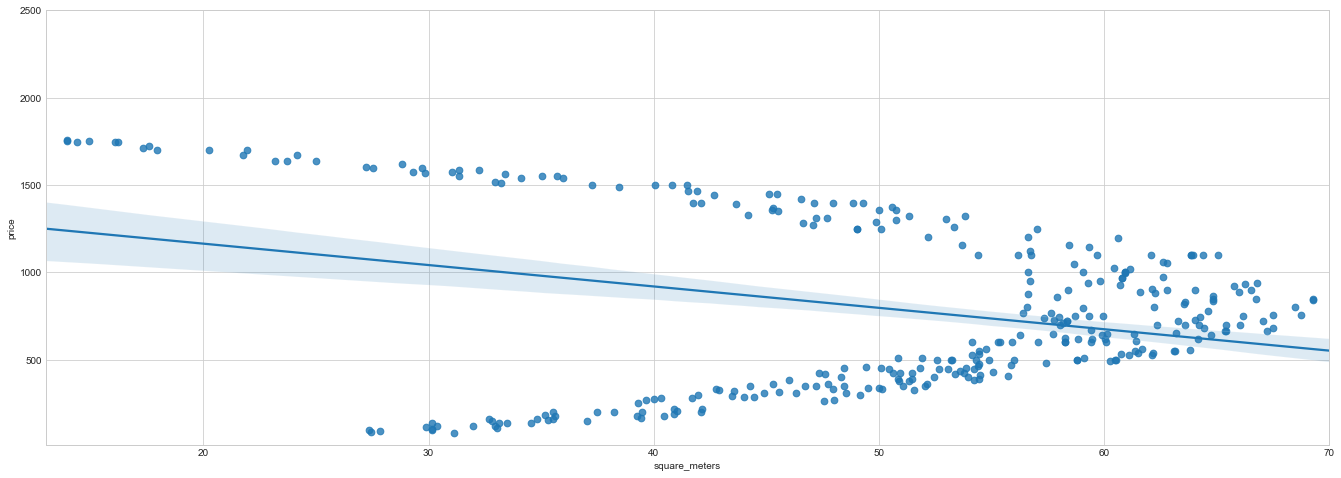

In [44]:
ax = sns.regplot(x = 'square_meters', y = 'price', data = ac_new2, scatter_kws={'s':45})
plt.xlim([13,70])
plt.ylim([10,2500])

In [45]:
X_cols = ['square_meters']

#Load the X data set
X = ac_new2[X_cols].values

#Initialize the data and column length variables
data_length = len(ac_new2)
column_length = len(ac_new2[X_cols].columns) 

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = ac_new2['price'].values
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test)

In [46]:
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

#Print the coefficient(s)
coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, listing_y_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test, listing_y_pred))

   y_prediction
0    607.444287
1    842.383837
2   1018.909137
3    629.247610
4    678.567427

Intercept: 1370.3274020012705
   square_meters
0     -11.659531

Mean Squared Error (MSE):210675.74
Variance Score (R^2):0.17


In [47]:
print(" Root Mean Squared Error (RMSE):%.2f" % np.sqrt(mean_squared_error(y_test, listing_y_pred)))

 Root Mean Squared Error (RMSE):458.99


(10, 2500)

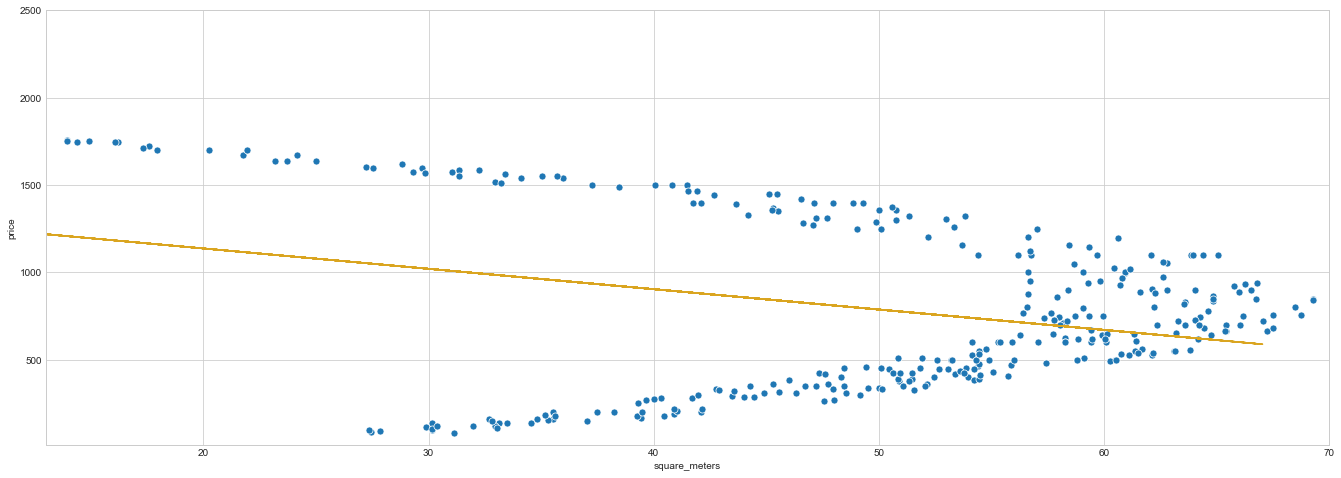

In [48]:
#Re-plot the graph using the results from Scikit-Learn
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = ac_new2, s=50)
plt.plot(X_test, listing_y_pred, color='goldenrod')
plt.xlim([13,70])
plt.ylim([10,2500])

Text(0.5, 1.0, 'HISTOGRAM OF RESIDUALS')

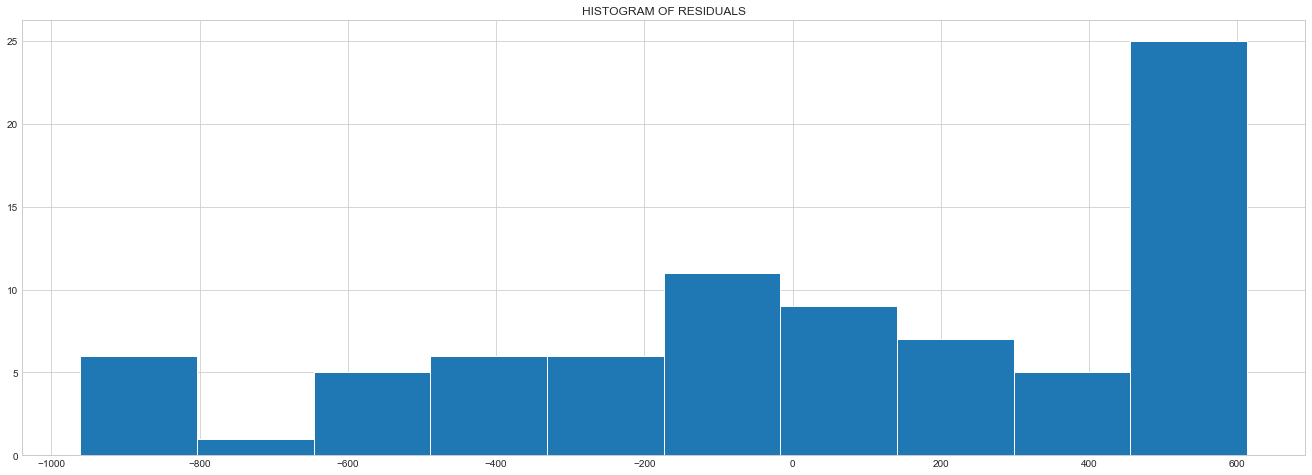

In [49]:
#Residuals
residuals = y_test - listing_y_pred
plt.hist(residuals)
plt.title("HISTOGRAM OF RESIDUALS")

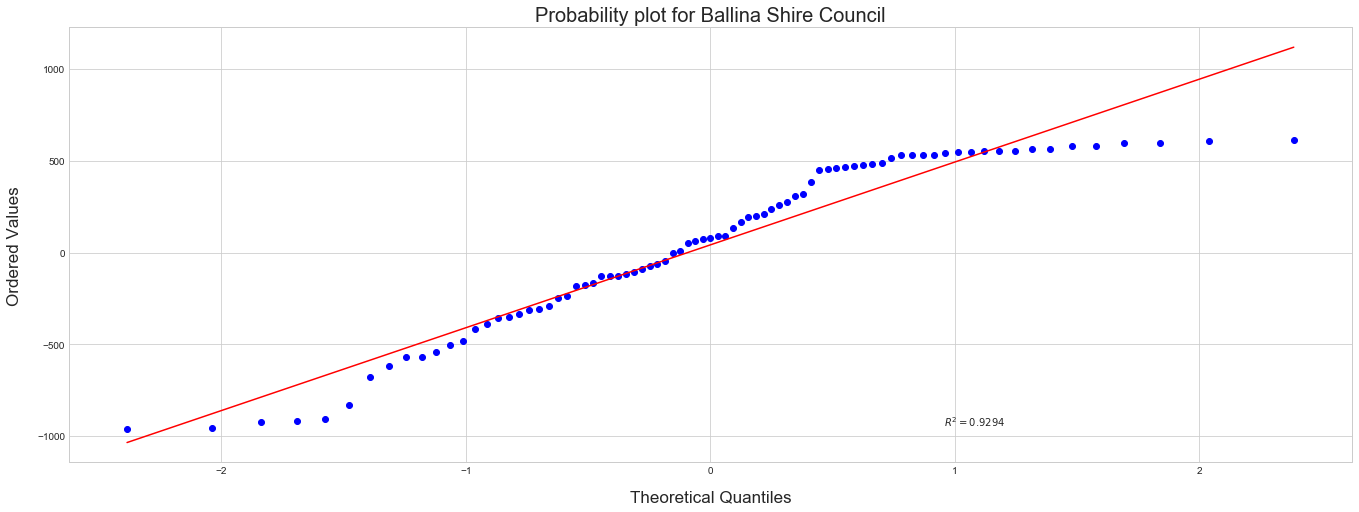

In [50]:
#probability plot

res_reshaped = residuals.reshape(-1,)  
stats.probplot(res_reshaped, dist="norm", plot=pylab, rvalue=True)
plt.title("Probability plot for Ballina Shire Council", fontsize=20)
plt.xlabel("Theoretical Quantiles", labelpad = 15, fontsize=17)
plt.ylabel("Ordered Values", labelpad = 15, fontsize=17);

pylab.show()

In [51]:
#BYRON SHIRE COUNCIL
dc1= ac2.loc[(ac2['neighbourhood_cleansed']=='BYRON SHIRE COUNCIL')]
dc2= dc1.loc[(dc1['property_type']=='House')]
dc3= dc2.loc[(dc2['state']=='NSW')]
dc4= dc3.loc[(dc3['room_type']=='Entire home/apt')]

In [52]:
ac_new3= dc4.drop(columns=['id','country','beds'])
ac_new3.describe()

,square_meters,price,bathrooms,bedrooms
count,1065.000000,1065.000000,1065.000000,1065.000000
mean,29.403991,1068.536150,1.929108,3.061033
std,3.606573,592.078048,0.794067,1.052670
min,4.000000,79.000000,0.000000,0.000000
25%,27.750000,600.000000,1.000000,3.000000
50%,29.910000,990.000000,2.000000,3.000000
75%,31.850000,1549.000000,2.500000,4.000000
max,77.000000,2427.000000,6.000000,7.000000


(10, 2500)

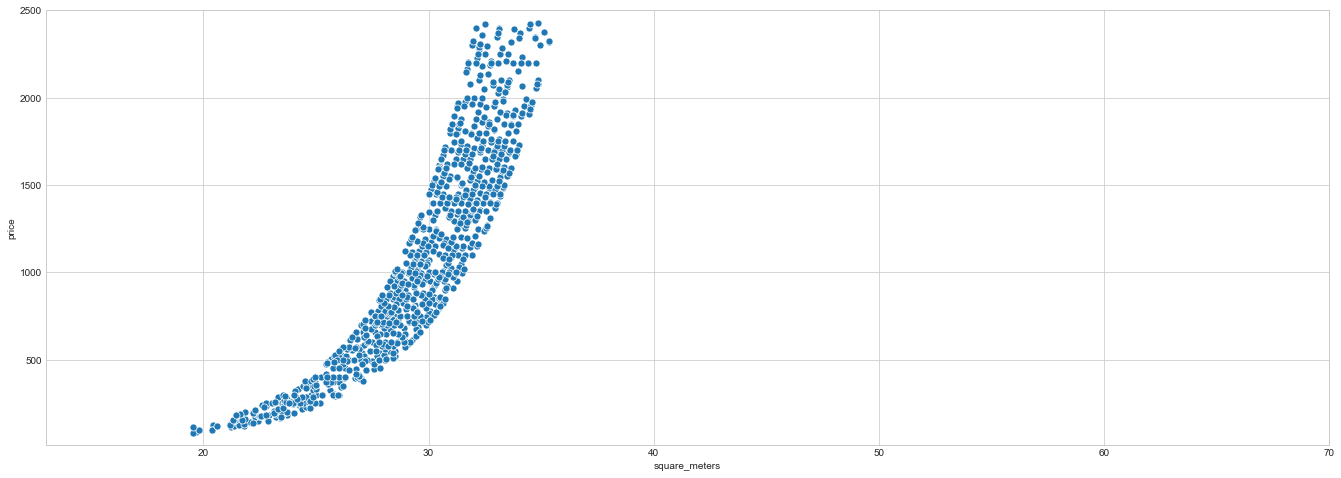

In [53]:
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = ac_new3, s=50)
plt.xlim([13,70])
plt.ylim([10,2500])

(10, 2500)

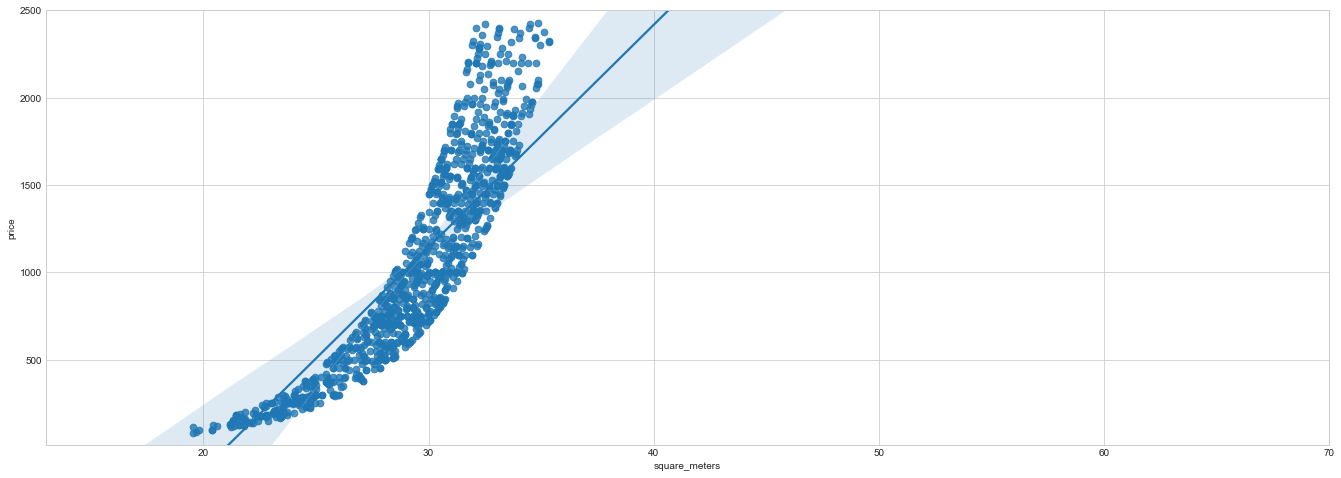

In [54]:
ax = sns.regplot(x = 'square_meters', y = 'price', data = ac_new3, scatter_kws={'s':45})
plt.xlim([13,70])
plt.ylim([10,2500])

In [55]:
X_cols = ['square_meters']

#Load the X data set
X = ac_new3[X_cols].values

#Initialize the data and column length variables
data_length = len(ac_new3)
column_length = len(ac_new3[X_cols].columns) 

#Reshape and load remaining data sets
X = X.reshape(data_length,column_length)
y = ac_new3['price'].values
y = y.reshape(data_length,1)

#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X,y)

#Create the linear regression object and train/fit models
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

#Make predictions using the testing set
listing_y_pred = lin_reg.predict(X_test)

In [56]:
print((pd.DataFrame(listing_y_pred, columns={'y_prediction'}).head(5)))
print()

#Print the intercept
print('Intercept:', float(lin_reg.intercept_))

#Print the coefficient(s)
coeff_df = pd.DataFrame(lin_reg.coef_)
coeff_df.columns = X_cols
print(coeff_df)
print()

#Performance Metric: Mean Squared Error
print("Mean Squared Error (MSE):%.2f" % mean_squared_error(y_test, listing_y_pred))

# Explained variance score:
print('Variance Score (R^2):%.2f' % r2_score(y_test, listing_y_pred))

   y_prediction
0   1380.641982
1   1281.040661
2   1160.096198
3   1335.584242
4   1678.260218

Intercept: -2424.3656611728193
   square_meters
0     118.573002

Mean Squared Error (MSE):92966.00
Variance Score (R^2):0.73


In [57]:
print(" Root Mean Squared Error (RMSE):%.2f" % np.sqrt(mean_squared_error(y_test, listing_y_pred)))

 Root Mean Squared Error (RMSE):304.90


(10, 2500)

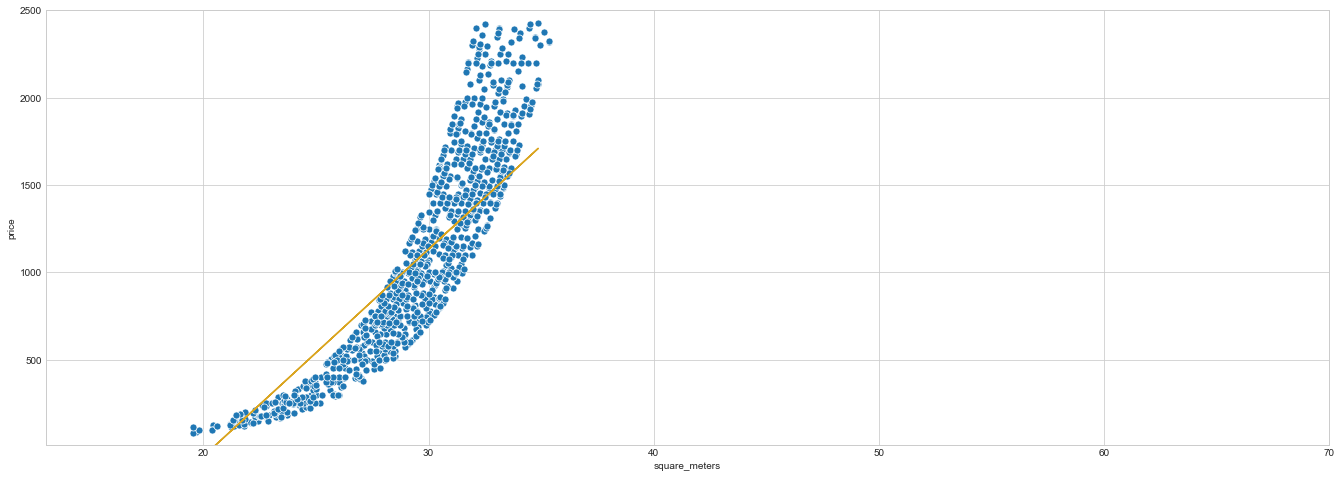

In [58]:
#Re-plot the graph using the results from Scikit-Learn
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = ac_new3, s=50)
plt.plot(X_test, listing_y_pred, color='goldenrod')
plt.xlim([13,70])
plt.ylim([10,2500])

Text(0.5, 1.0, 'HISTOGRAM OF RESIDUALS')

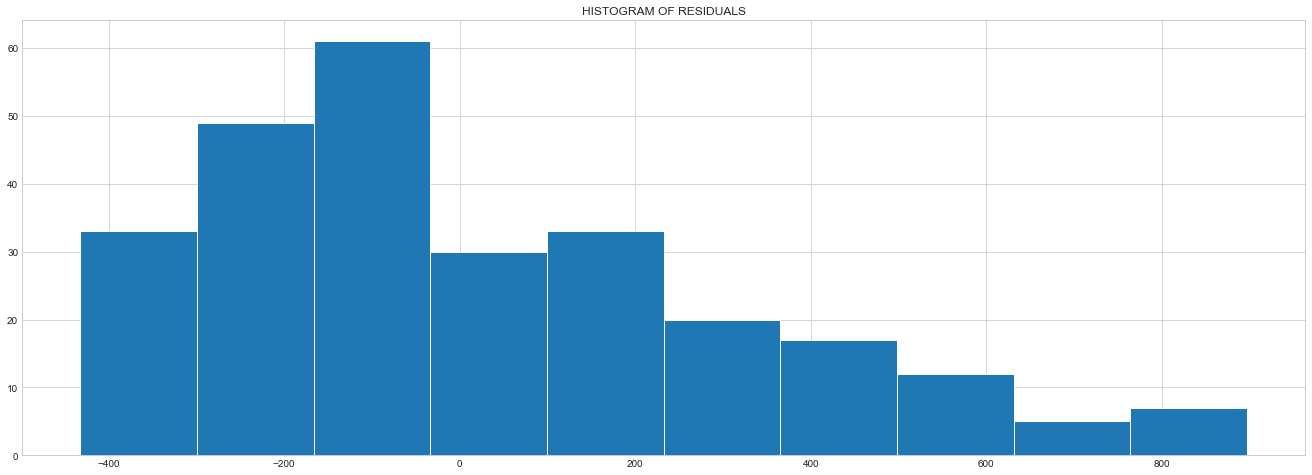

In [59]:
#Residuals
residuals = y_test - listing_y_pred
plt.hist(residuals)
plt.title("HISTOGRAM OF RESIDUALS")

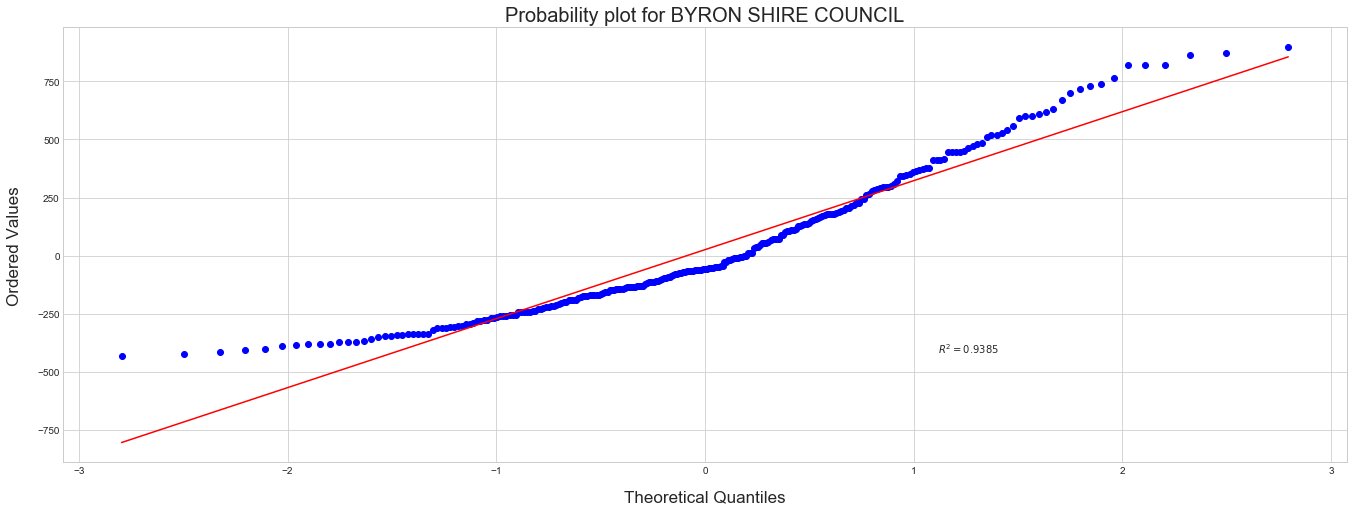

In [61]:
#probability plot

res_reshaped = residuals.reshape(-1,)  
stats.probplot(res_reshaped, dist="norm", plot=pylab, rvalue=True)
plt.title("Probability plot for BYRON SHIRE COUNCIL", fontsize=20)
plt.xlabel("Theoretical Quantiles", labelpad = 15, fontsize=17)
plt.ylabel("Ordered Values", labelpad = 15, fontsize=17);

pylab.show()

In [62]:
from scipy import stats
regression_data = stats.linregress(ac_new.square_meters,ac_new.price)
regression_data

LinregressResult(slope=53.58404438021244, intercept=-1145.0516445394574, rvalue=0.9571753731831002, pvalue=3.136966859541652e-104, stderr=1.175787497593368)

(10, 2500)

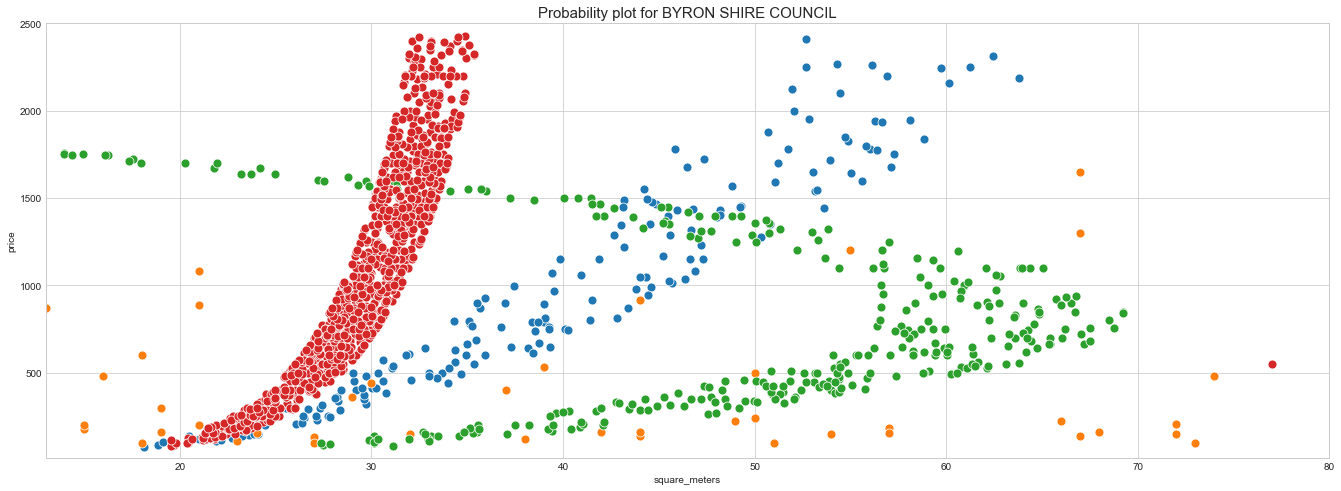

In [63]:
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = ac_new, s=80)
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = ac_new1, s=80)
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = ac_new2, s=80)
ax = sns.scatterplot(x = 'square_meters', y = 'price', data = ac_new3, s=80)
plt.title("Probability plot for BYRON SHIRE COUNCIL", fontsize=15)
plt.xlim([13,80])
plt.ylim([10,2500])

# Hypothesis testing

## Acquiring Data and simple exploration.

In [64]:
datapath_1="https://docs.google.com/spreadsheets/d/e/2PACX-1vSwkx11lH2BHbUpNrghZBAFJF4dv4yBEdct2i-1j0UO8P-6HBP1njhkqtFbRshivhUzdilvfGMSCuxN/pub?gid=1681362478&single=true&output=csv"
datapath_2="https://docs.google.com/spreadsheets/d/e/2PACX-1vSmeAmxZp4fhMw7eN4om2SZxqo2M6gCb6Eh0cfLuUM5aKCUn7qpc234JlPsMuugpOKAzeOuSqEvwEfM/pub?gid=1957711048&single=true&output=csv"
lax= pd.read_csv(datapath_1)
sfo= pd.read_csv(datapath_2)

In [65]:
list(sfo)

['Date', 'SFO - Avg. Daily Miles Driven Per Hour', 'Marketing_Campaign']

In [66]:
sfo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
Date                                      103 non-null object
SFO - Avg. Daily Miles Driven Per Hour    103 non-null float64
Marketing_Campaign                        103 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


In [67]:
sfo.describe()

,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,57.964064,0.281553
std,31.105058,0.451956
min,3.189480,0.000000
25%,40.780047,0.000000
50%,63.811228,0.000000
75%,83.838581,1.000000
max,113.773589,1.000000


In [68]:
sfo.tail()

,Date,SFO - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
98,12/21/2019,7.897631,1
99,12/22/2019,82.737413,1
100,12/23/2019,110.943196,1
101,12/24/2019,69.857224,0
102,12/25/2019,103.305247,0


## Column Definitions

#### 1. Date - The date that the observation was recorded.
#### 2. SFO - Avg. Daily Miles Driven Per Hour
#### 3. Marketing_Campaign - A binary field that is set to either 1 for going with the marketing campaign or 0 for without the marketing campaign.

## Test Setup
### The Null Hypothesis is that the average daily miles driven per hour with marketing campaign is the same as the miles driven per hour when there was no marketing structure in to action.

### The Alternate Hypothesis is that average daily miles driven per hour with marketing campaign is greater than the miles driven per hour when there was no marketing structure in action.

### The p-value will be set to .05

## Marketing Campaign

### Plot to show effect of marketing campaign on average miles in SFO

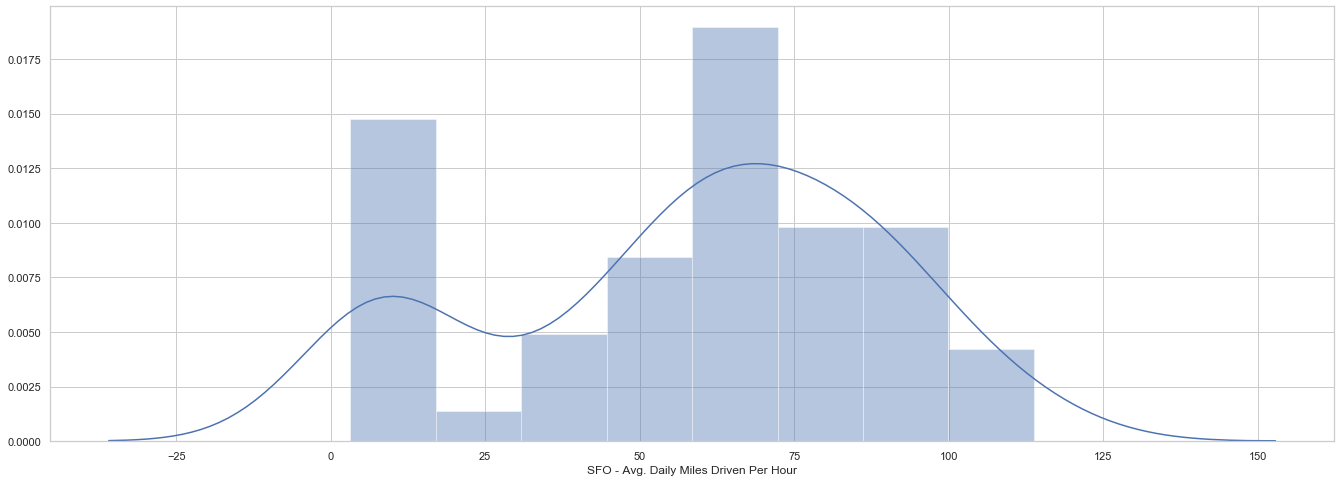

In [69]:
sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(sfo['SFO - Avg. Daily Miles Driven Per Hour'], bins = 8)

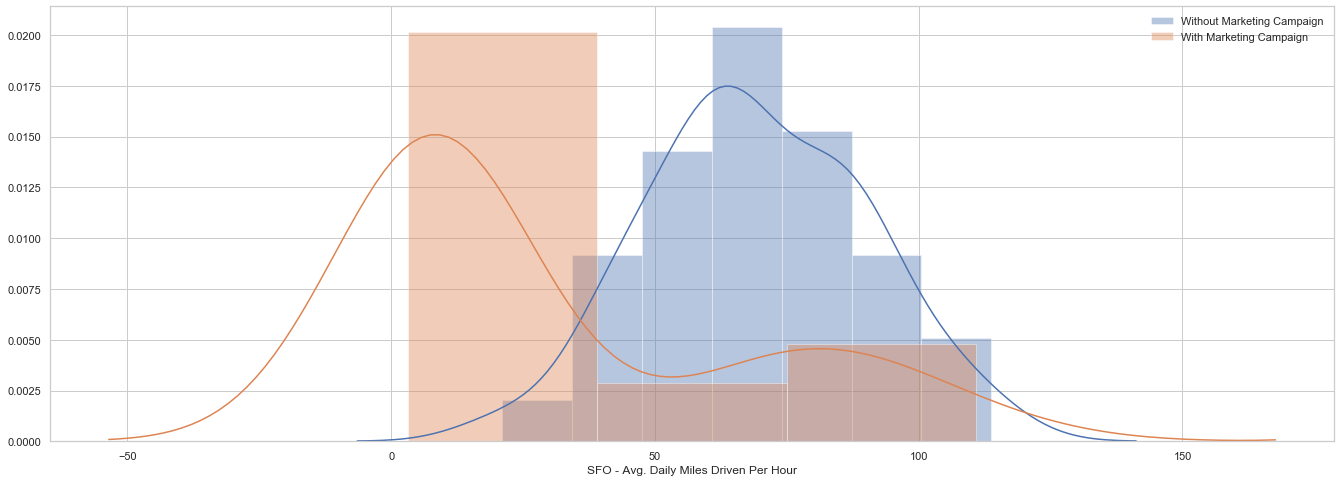

In [70]:
data0 = sfo['SFO - Avg. Daily Miles Driven Per Hour'].loc[sfo['Marketing_Campaign']==0]
data1 = sfo['SFO - Avg. Daily Miles Driven Per Hour'].loc[sfo['Marketing_Campaign']==1]

sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(data0, hist=True)
ax = sns.distplot(data1, hist=True)
plt.legend(['Without Marketing Campaign','With Marketing Campaign'])

In [71]:
data1

72      93.990334
73      67.449196
74      89.818048
75      68.326076
76      85.536747
77      67.268089
78       5.987215
79       9.103476
80       3.189480
81       4.524104
82      10.113485
83       8.260622
84       8.897841
85       8.466439
86       8.955617
87       9.072504
88       9.176986
89      10.339448
90       6.429032
91       9.828868
92       8.685952
93      10.630663
94       6.348002
95       8.417974
96       9.962857
97       9.792624
98       7.897631
99      82.737413
100    110.943196
Name: SFO - Avg. Daily Miles Driven Per Hour, dtype: float64

In [72]:
# Analysis of Variance test
from numpy.random import seed
from numpy.random import randn
from scipy.stats import f_oneway

#generate three independent samples
data0 = sfo['SFO - Avg. Daily Miles Driven Per Hour'].loc[sfo['Marketing_Campaign']==0]
data1 = sfo['SFO - Avg. Daily Miles Driven Per Hour'].loc[sfo['Marketing_Campaign']==1]

#compare samples
stat, p = f_oneway(data0, data1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=52.923, p=0.000
Different distributions (reject H0)


## Working on LAX data

In [85]:
list(lax)

['Date', 'LAX - Avg. Daily Miles Driven Per Hour', 'Marketing_Campaign']

In [86]:
lax.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103 entries, 0 to 102
Data columns (total 3 columns):
Date                                      103 non-null object
LAX - Avg. Daily Miles Driven Per Hour    103 non-null float64
Marketing_Campaign                        103 non-null int64
dtypes: float64(1), int64(1), object(1)
memory usage: 2.5+ KB


### Quantitative Variable Overview

In [87]:
lax.describe()

,LAX - Avg. Daily Miles Driven Per Hour,Marketing_Campaign
count,103.000000,103.000000
mean,121.031326,0.291262
std,67.396041,0.456566
min,-80.427385,0.000000
25%,75.034959,0.000000
50%,116.258231,0.000000
75%,169.536286,1.000000
max,273.550819,1.000000


## Column Definitions¶
#### 1. Date - The date that the observation was recorded.
#### 2. LAX - Avg. Daily Miles Driven Per Hour
#### 3. Marketing_Campaign - A binary field that is set to either 1 for going with the marketing campaign or 0 for without the marketing campaign

### Removing negative values from the average column as average cannot be negative.

In [88]:

lax_cleaned= lax.loc[(lax['LAX - Avg. Daily Miles Driven Per Hour']>= 0)]

### Plot to show effect of marketing campaign on average miles in LAX

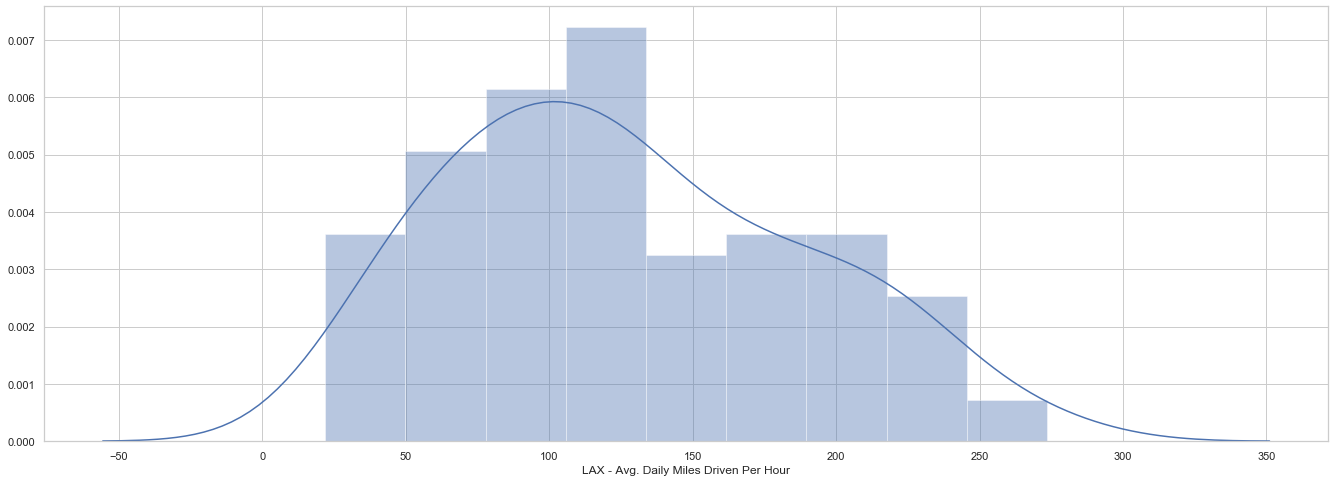

In [89]:
sns.set_style('whitegrid')
plt.figure(figsize=(23,8))
sns.set(style='whitegrid')
ax = sns.distplot(lax_cleaned['LAX - Avg. Daily Miles Driven Per Hour'], bins = 9)

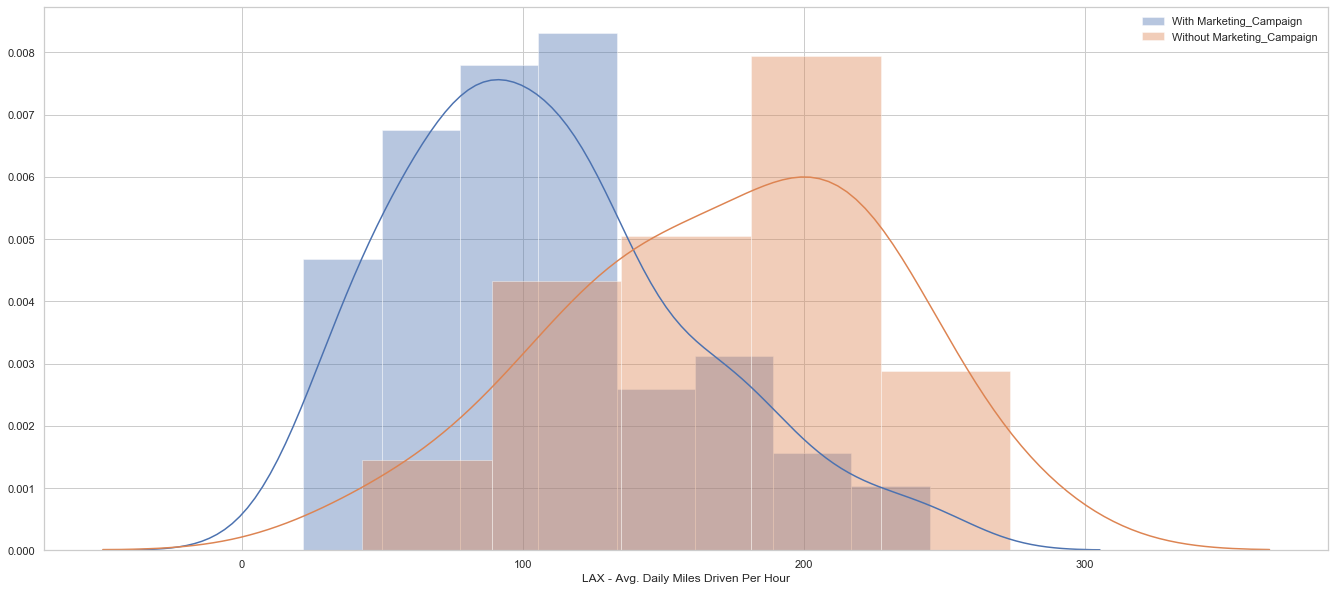

In [90]:
data0_lax = lax_cleaned['LAX - Avg. Daily Miles Driven Per Hour'].loc[lax_cleaned['Marketing_Campaign']==0]
data1_lax = lax_cleaned['LAX - Avg. Daily Miles Driven Per Hour'].loc[lax_cleaned['Marketing_Campaign']==1]

sns.set_style('whitegrid')
plt.figure(figsize=(23,10))
sns.set(style='whitegrid')
ax = sns.distplot(data0_lax, hist=True)
ax = sns.distplot(data1_lax, hist=True)
plt.legend(['With Marketing_Campaign','Without Marketing_Campaign'])

In [91]:
# Analysis of Variance test
#generate three independent samples
data0 = lax_cleaned['LAX - Avg. Daily Miles Driven Per Hour'].loc[lax_cleaned['Marketing_Campaign']==0]
data1 = lax_cleaned['LAX - Avg. Daily Miles Driven Per Hour'].loc[lax_cleaned['Marketing_Campaign']==1]

#compare samples
stat, p = f_oneway(data0, data1)
print('Statistics=%.3f, p=%.3f' % (stat, p))

#interpret
alpha = 0.05
if p > alpha:
	print('Same distributions (fail to reject H0)')
else:
	print('Different distributions (reject H0)')

Statistics=31.971, p=0.000
Different distributions (reject H0)


In [94]:
data0_lax.mean()

107.08663156681158

In [95]:
data1_lax.mean()

173.0208936986666

## Observation
- On comparing daily miles driven per hour, we see that the mean is less than 110 without marketing campaign and greater than 110 with the help of marketing campaign.



#### Also, since the value of p is less than alpha, we reject the null hypothesis.